# Import Modules

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
import matplotlib.ticker as ticker
import os

# Helper Methods

In [387]:
def export_plot(filename, folder='../results/eda', dpi=300, bbox_inches='tight'):
    os.makedirs(folder, exist_ok=True)
    full_path = os.path.normpath(os.path.join(folder, f"{filename}.png"))
    plt.savefig(full_path, dpi=dpi, bbox_inches=bbox_inches)
    print(f"Plot saved at: {full_path}")


# Load Dataset

In [339]:
# Define the path to the processed dataset
file_path = '../data/processed/merged_dataset.csv'

In [340]:
# Load the dataset
df = pd.read_csv(file_path)

In [341]:
# Display basic info
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (3046, 43)


,AREA,ITEM,YEAR,YIELD,AREA_HARVESTED,PRODUCTION_QUANTITY,WB_CCKP_CDD,WB_CCKP_CDD65,WB_CCKP_CSDI,WB_CCKP_CWD,...,WB_CCKP_TASMIN,WB_CCKP_TNN,WB_CCKP_TR,WB_CCKP_TR23,WB_CCKP_TR26,WB_CCKP_TR29,WB_CCKP_TR32,WB_CCKP_TX84RR,WB_CCKP_TXX,WB_CCKP_WSDI
0,Albania,Barley,1990,1000.0,5000.0,5000.0,27.05,548.49,5.60,14.53,...,12.50,-8.07,66.02,25.22,2.65,0.02,0.00,0.05,24.78,21.31
1,Albania,Barley,1991,923.1,3600.0,3323.0,23.78,492.26,33.37,9.44,...,11.21,-13.93,60.51,21.68,2.48,0.00,0.00,0.03,24.22,0.38
2,Albania,Barley,1992,1380.2,4035.0,5569.0,29.91,579.35,7.62,10.14,...,11.83,-11.56,66.79,27.46,5.56,0.11,0.00,0.08,25.25,0.00
3,Albania,Barley,1993,1332.4,3117.0,4153.0,24.83,629.48,7.81,9.02,...,11.99,-11.03,73.15,30.26,6.19,0.26,0.00,0.10,26.22,6.07
4,Albania,Barley,1994,2352.3,3826.0,9000.0,24.24,810.85,0.00,11.43,...,13.06,-6.09,87.27,42.15,11.38,0.88,0.08,0.15,27.95,9.24


# Minor Preprocessing & Filtering

In [342]:
# Define region mapping
region_map = {
    # Western Europe
    'Austria': 'Western Europe', 'Belgium': 'Western Europe', 'France': 'Western Europe',
    'Germany': 'Western Europe', 'Netherlands': 'Western Europe', 'Switzerland': 'Western Europe',
    'Luxembourg': 'Western Europe', 'Ireland': 'Western Europe',

    # Northern Europe
    'Denmark': 'Northern Europe', 'Estonia': 'Northern Europe', 'Finland': 'Northern Europe',
    'Iceland': 'Northern Europe', 'Latvia': 'Northern Europe', 'Lithuania': 'Northern Europe',
    'Norway': 'Northern Europe', 'Sweden': 'Northern Europe', 'United Kingdom': 'Northern Europe',

    # Southern Europe
    'Albania': 'Southern Europe', 'Bosnia and Herzegovina': 'Southern Europe', 'Croatia': 'Southern Europe',
    'Greece': 'Southern Europe', 'Italy': 'Southern Europe', 'Malta': 'Southern Europe',
    'Montenegro': 'Southern Europe', 'North Macedonia': 'Southern Europe', 'Portugal': 'Southern Europe',
    'Serbia': 'Southern Europe', 'Slovenia': 'Southern Europe', 'Spain': 'Southern Europe',

    # Eastern Europe
    'Belarus': 'Eastern Europe', 'Bulgaria': 'Eastern Europe', 'Czechia': 'Eastern Europe',
    'Hungary': 'Eastern Europe', 'Moldova': 'Eastern Europe', 'Poland': 'Eastern Europe',
    'Romania': 'Eastern Europe', 'Russian Federation': 'Eastern Europe',
    'Slovak Republic': 'Eastern Europe', 'Ukraine': 'Eastern Europe'
}

In [343]:
# Map REGION column
df['REGION'] = df['AREA'].map(region_map)

In [344]:
# Check for unmapped countries
unmapped = df[df['REGION'].isnull()]['AREA'].unique()

if len(unmapped) == 0:
    print("All AREA values were successfully mapped to a REGION.")
else:
    print("Unmapped AREA values found:")
    for country in unmapped:
        print(f"  - {country}")

All AREA values were successfully mapped to a REGION.


In [345]:
# Filter dataset for 2012–2022
df_filtered = df[df['YEAR'].between(2012, 2022)]
print(f"Filtered dataset to years 2012–2022. Rows remaining: {df_filtered.shape[0]}")

Filtered dataset to years 2012–2022. Rows remaining: 1169


# Yield Trends (2012-2022)

In [346]:
# Define fixed color palette for regions
region_colors = {
    'Western Europe': '#1f77b4',
    'Northern Europe': '#ff7f0e',
    'Southern Europe': '#2ca02c',
    'Eastern Europe': '#d62728'
}

Plot saved at: ..\results\eda\yield_trends_barley_by_region.png


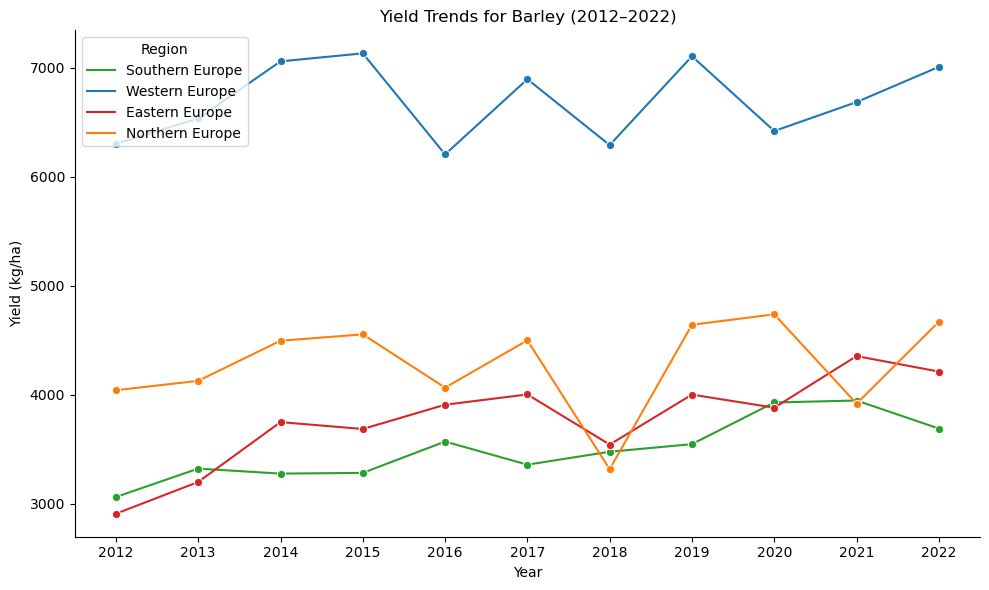

In [347]:
# Filter data to Barley only
data = df_filtered[df_filtered['ITEM'] == 'Barley'].copy()

# Create full set of years and regions
years = np.arange(2012, 2023)
regions = data['REGION'].unique()
full_index = pd.MultiIndex.from_product([regions, years], names=['REGION', 'YEAR'])

# Aggregate to mean yield
grouped = data.groupby(['REGION', 'YEAR'])['YIELD'].mean()

# Reindex to full region-year grid
filled_data = grouped.reindex(full_index).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=filled_data, x='YEAR', y='YIELD', hue='REGION',
             palette=region_colors, marker='o', errorbar=None)

plt.title("Yield Trends for Barley (2012–2022)")
plt.xlabel("Year")
plt.ylabel("Yield (kg/ha)")
plt.xticks(ticks=years)  # Ensure all years are on X-axis

sns.despine()
plt.grid(False)
plt.legend(title="Region", loc='upper left')
plt.tight_layout()
export_plot("yield_trends_barley_by_region")
plt.show()

Plot saved at: ..\results\eda\yield_trends_barley_by_region_with_events.png


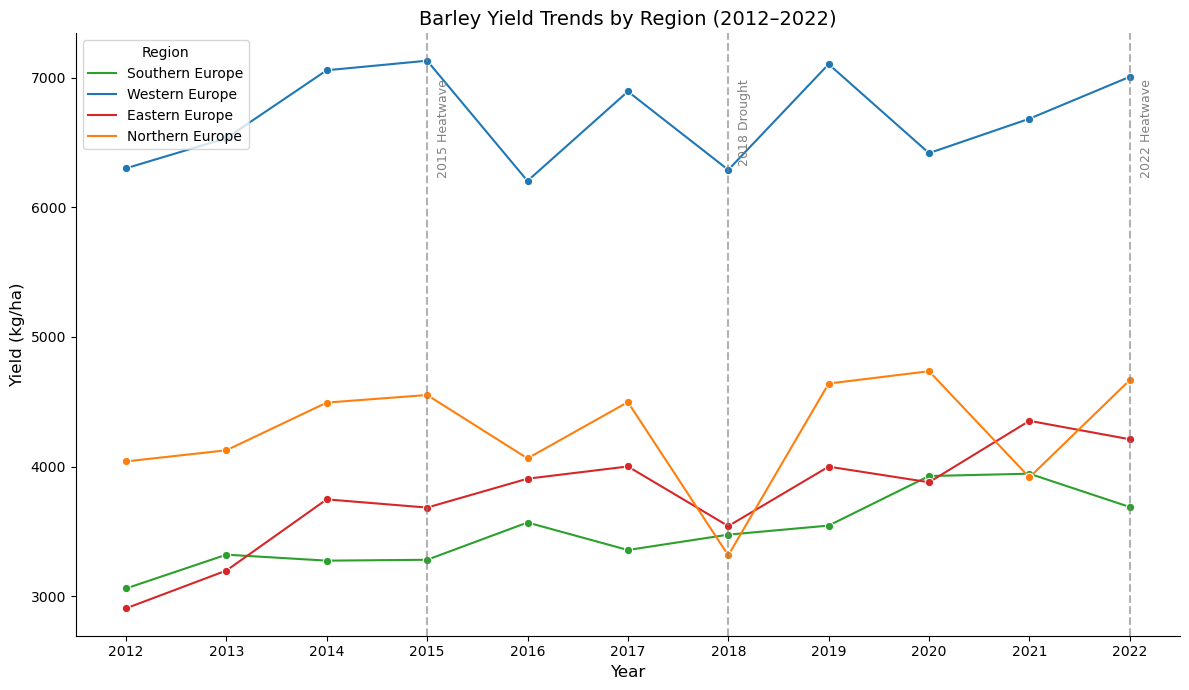

In [348]:
# Filter data to Barley only
data = df_filtered[df_filtered['ITEM'] == 'Barley'].copy()

# Create full set of years and regions
years = np.arange(2012, 2023)
regions = data['REGION'].unique()
full_index = pd.MultiIndex.from_product([regions, years], names=['REGION', 'YEAR'])

# Aggregate to mean yield
grouped = data.groupby(['REGION', 'YEAR'])['YIELD'].mean()

# Reindex to full region-year grid
filled_data = grouped.reindex(full_index).reset_index()

# Plot
plt.figure(figsize=(12, 7))
sns.lineplot(data=filled_data, x='YEAR', y='YIELD', hue='REGION',
             palette=region_colors, marker='o', errorbar=None)

# Add vertical lines for major climate events
event_years = [2015, 2018, 2022]
event_labels = ['2015 Heatwave', '2018 Drought', '2022 Heatwave']

for year, label in zip(event_years, event_labels):
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.6)
    plt.text(x=year + 0.1,
             y=filled_data['YIELD'].max() * 0.98,
             s=label,
             fontsize=9,
             rotation=90,
             color='gray',
             verticalalignment='top')

# Title and labels
plt.title("Barley Yield Trends by Region (2012–2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Yield (kg/ha)", fontsize=12)
plt.xticks(ticks=years)

# Visual polish
sns.despine()
plt.grid(False)
plt.legend(title="Region", loc='upper left')
plt.tight_layout()
export_plot("yield_trends_barley_by_region_with_events")
plt.show()

Plot saved at: ..\results\eda\yield_trends_wheat_by_region.png


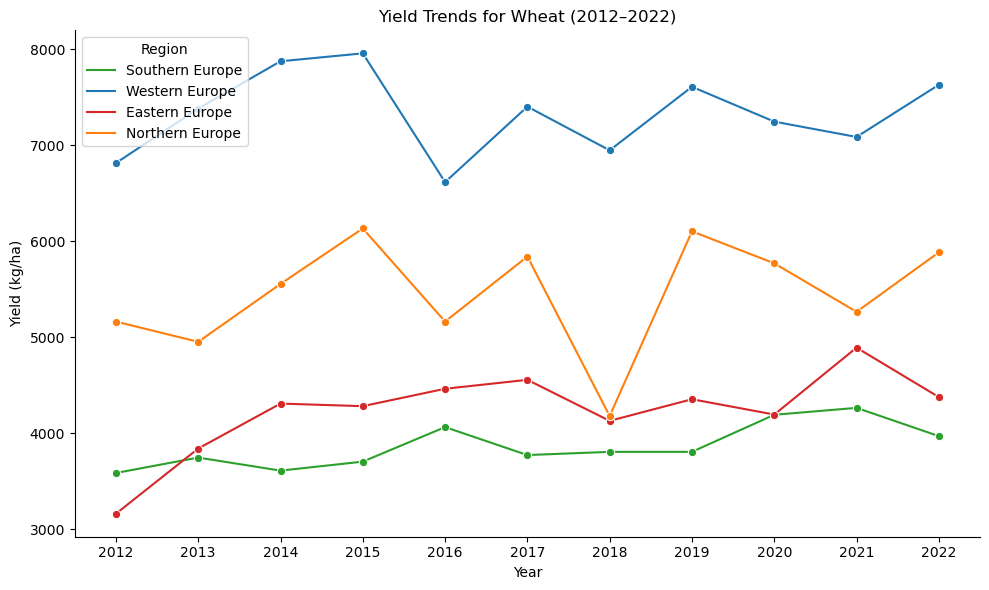

In [349]:
# Filter data to Barley only
data = df_filtered[df_filtered['ITEM'] == 'Wheat'].copy()

# Create full set of years and regions
years = np.arange(2012, 2023)
regions = data['REGION'].unique()
full_index = pd.MultiIndex.from_product([regions, years], names=['REGION', 'YEAR'])

# Aggregate to mean yield
grouped = data.groupby(['REGION', 'YEAR'])['YIELD'].mean()

# Reindex to full region-year grid
filled_data = grouped.reindex(full_index).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=filled_data, x='YEAR', y='YIELD', hue='REGION',
             palette=region_colors, marker='o', errorbar=None)

plt.title("Yield Trends for Wheat (2012–2022)")
plt.xlabel("Year")
plt.ylabel("Yield (kg/ha)")
plt.xticks(ticks=years)  # Ensure all years are on X-axis

sns.despine()
plt.grid(False)
plt.legend(title="Region", loc='upper left')
plt.tight_layout()
export_plot("yield_trends_wheat_by_region")
plt.show()

Plot saved at: ..\results\eda\yield_trends_wheat_by_region_with_events.png


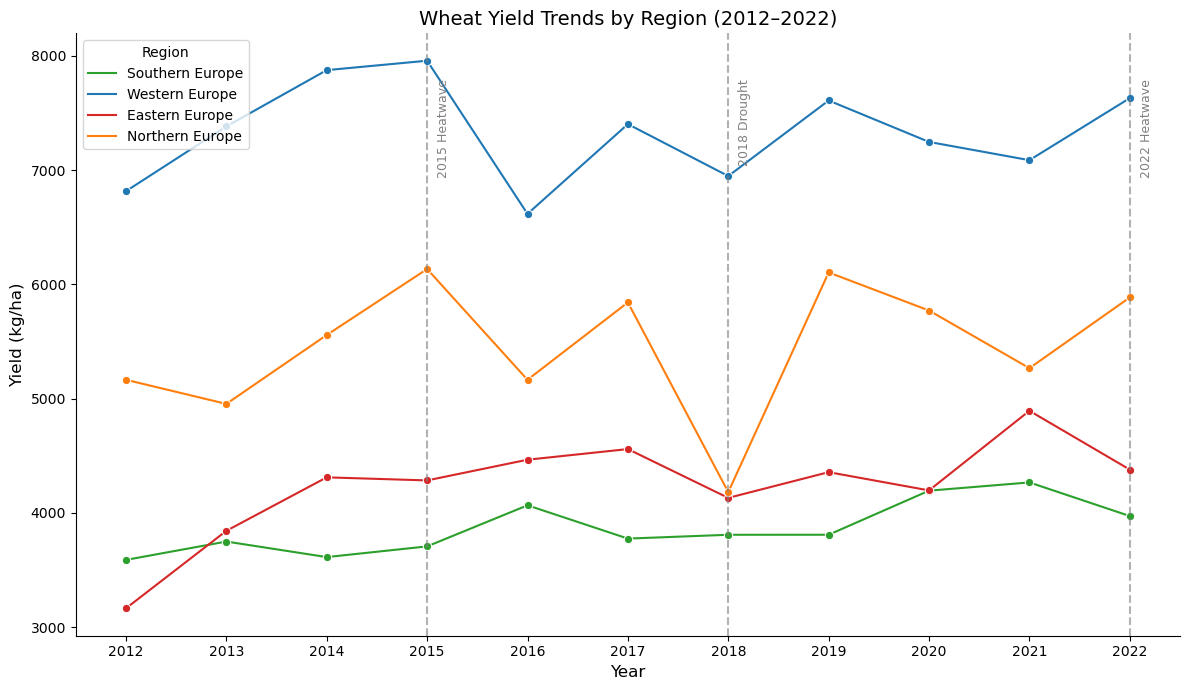

In [350]:
# Filter data to Wheat only
data = df_filtered[df_filtered['ITEM'] == 'Wheat'].copy()

# Create full set of years and regions
years = np.arange(2012, 2023)
regions = data['REGION'].unique()
full_index = pd.MultiIndex.from_product([regions, years], names=['REGION', 'YEAR'])

# Aggregate to mean yield
grouped = data.groupby(['REGION', 'YEAR'])['YIELD'].mean()
filled_data = grouped.reindex(full_index).reset_index()

# Plot
plt.figure(figsize=(12, 7))
sns.lineplot(data=filled_data, x='YEAR', y='YIELD', hue='REGION',
             palette=region_colors, marker='o', errorbar=None)

# Climate events
event_years = [2015, 2018, 2022]
event_labels = ['2015 Heatwave', '2018 Drought', '2022 Heatwave']

for year, label in zip(event_years, event_labels):
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.6)
    plt.text(x=year + 0.1, y=filled_data['YIELD'].max() * 0.98, s=label,
             fontsize=9, rotation=90, color='gray', verticalalignment='top')

plt.title("Wheat Yield Trends by Region (2012–2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Yield (kg/ha)", fontsize=12)
plt.xticks(ticks=years)
sns.despine()
plt.grid(False)
plt.legend(title="Region", loc='upper left')
plt.tight_layout()
export_plot("yield_trends_wheat_by_region_with_events")
plt.show()


Plot saved at: ..\results\eda\yield_trends_maize_by_region.png


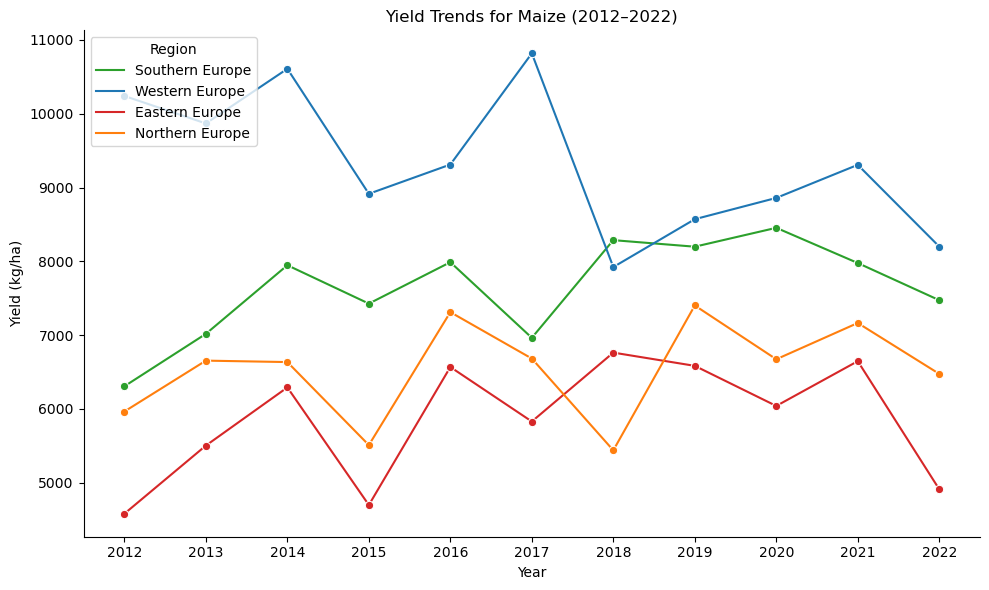

In [351]:
# Filter data to Barley only
data = df_filtered[df_filtered['ITEM'] == 'Maize (corn)'].copy()

# Create full set of years and regions
years = np.arange(2012, 2023)
regions = data['REGION'].unique()
full_index = pd.MultiIndex.from_product([regions, years], names=['REGION', 'YEAR'])

# Aggregate to mean yield
grouped = data.groupby(['REGION', 'YEAR'])['YIELD'].mean()

# Reindex to full region-year grid
filled_data = grouped.reindex(full_index).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=filled_data, x='YEAR', y='YIELD', hue='REGION',
             palette=region_colors, marker='o', errorbar=None)

plt.title("Yield Trends for Maize (2012–2022)")
plt.xlabel("Year")
plt.ylabel("Yield (kg/ha)")
plt.xticks(ticks=years)  # Ensure all years are on X-axis

sns.despine()
plt.grid(False)
plt.legend(title="Region", loc='upper left')
plt.tight_layout()
export_plot("yield_trends_maize_by_region")
plt.show()

Plot saved at: ..\results\eda\yield_trends_maize_by_region_with_events.png


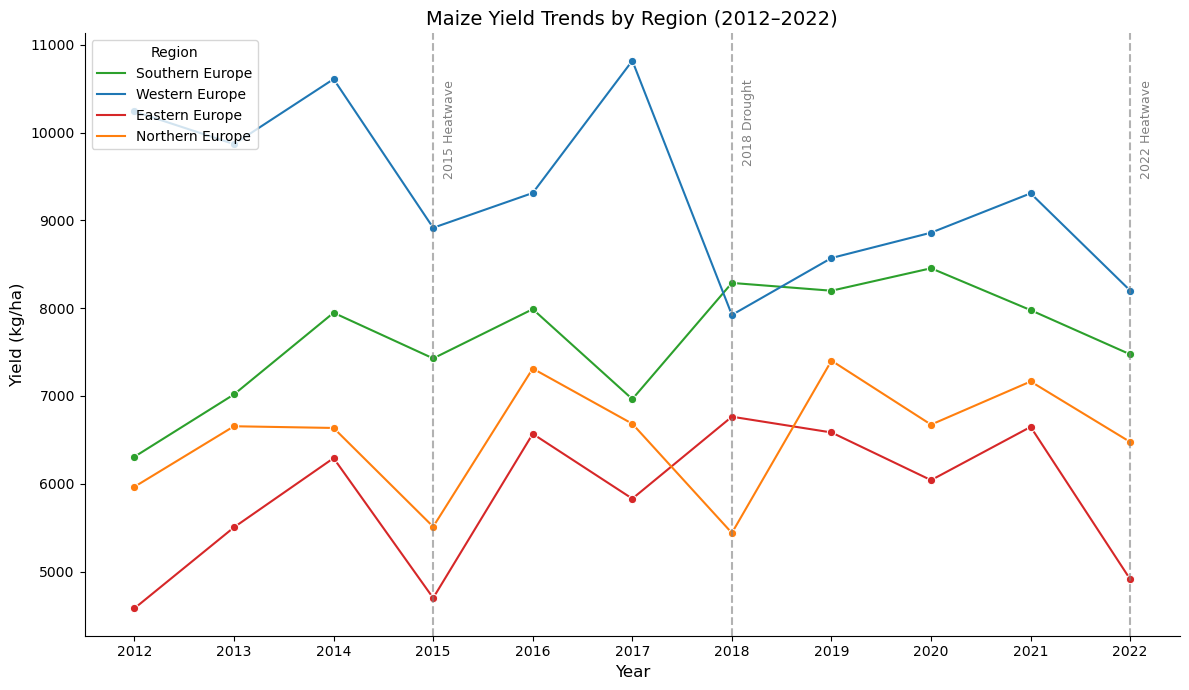

In [352]:
# Filter data to Maize only
data = df_filtered[df_filtered['ITEM'] == 'Maize (corn)'].copy()

# Create full set of years and regions
years = np.arange(2012, 2023)
regions = data['REGION'].unique()
full_index = pd.MultiIndex.from_product([regions, years], names=['REGION', 'YEAR'])

# Aggregate to mean yield
grouped = data.groupby(['REGION', 'YEAR'])['YIELD'].mean()
filled_data = grouped.reindex(full_index).reset_index()

# Plot
plt.figure(figsize=(12, 7))
sns.lineplot(data=filled_data, x='YEAR', y='YIELD', hue='REGION',
             palette=region_colors, marker='o', errorbar=None)

# Climate events
event_years = [2015, 2018, 2022]
event_labels = ['2015 Heatwave', '2018 Drought', '2022 Heatwave']

for year, label in zip(event_years, event_labels):
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.6)
    plt.text(x=year + 0.1, y=filled_data['YIELD'].max() * 0.98, s=label,
             fontsize=9, rotation=90, color='gray', verticalalignment='top')

plt.title("Maize Yield Trends by Region (2012–2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Yield (kg/ha)", fontsize=12)
plt.xticks(ticks=years)
sns.despine()
plt.grid(False)
plt.legend(title="Region", loc='upper left')
plt.tight_layout()
export_plot("yield_trends_maize_by_region_with_events")
plt.show()


Plot saved at: ..\results\eda\average_crop_yield_europe_2012_2022.png


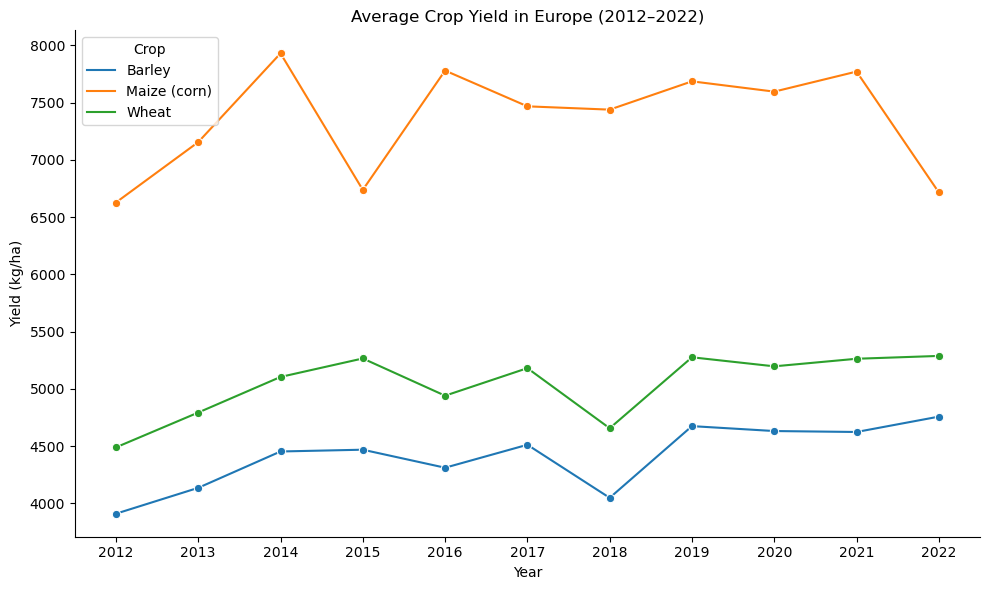

In [353]:
# Crop and color order
crop_order = ["Barley", "Maize (corn)", "Wheat"]
crop_palette = {
    "Barley": sns.color_palette()[0],       # blue
    "Maize (corn)": sns.color_palette()[1], # orange
    "Wheat": sns.color_palette()[2]         # green
}

# Grouped data
europe_yield_trends = df_filtered.groupby(['YEAR', 'ITEM'])['YIELD'].mean().reset_index()
europe_yield_trends['ITEM'] = pd.Categorical(europe_yield_trends['ITEM'], categories=crop_order, ordered=True)

# Ensure all years on x-axis
all_years = list(range(2012, 2023))
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=europe_yield_trends,
    x='YEAR', y='YIELD', hue='ITEM',
    palette=crop_palette,
    marker='o', errorbar=None
)

# Force all years on x-axis
plt.xticks(all_years)
plt.title("Average Crop Yield in Europe (2012–2022)")
plt.xlabel("Year")
plt.ylabel("Yield (kg/ha)")

sns.despine()
plt.grid(False)
plt.legend(title="Crop", loc='upper left')
plt.tight_layout()
export_plot("average_crop_yield_europe_2012_2022")
plt.show()

Plot saved at: ..\results\eda\average_crop_yield_europe_2012_2022_with_events.png


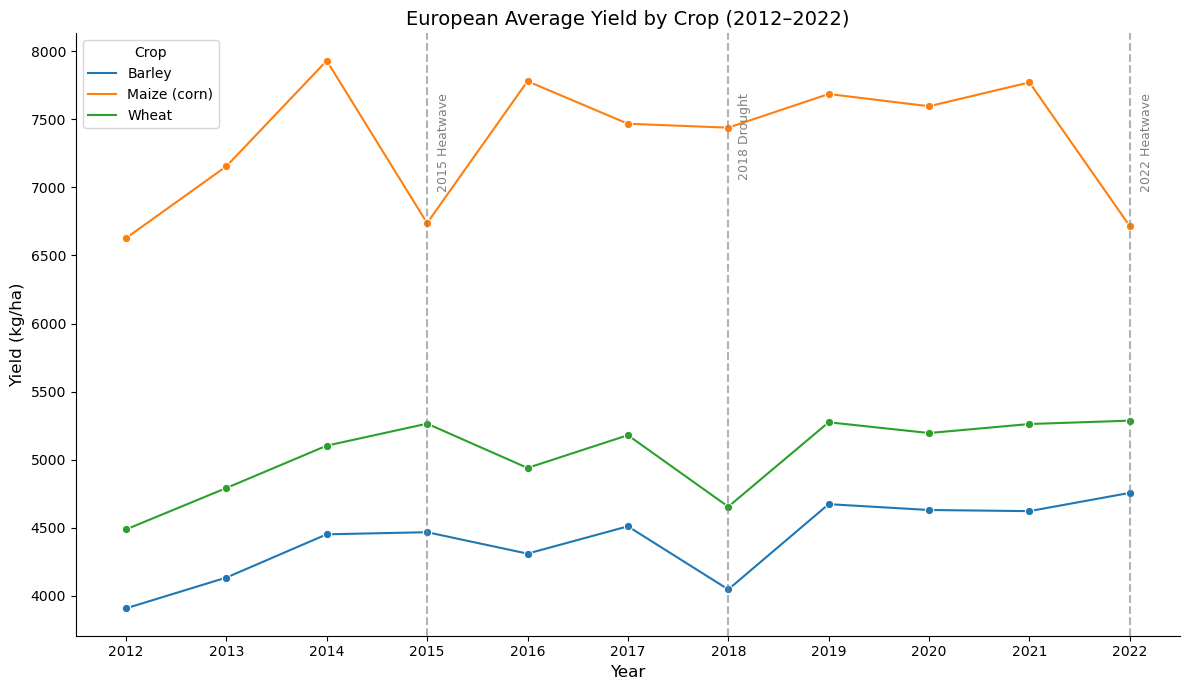

In [354]:
# Define consistent crop order and colors
crop_order = ["Barley", "Maize (corn)", "Wheat"]
crop_palette = {
    "Barley": sns.color_palette()[0],       # blue
    "Maize (corn)": sns.color_palette()[1], # orange
    "Wheat": sns.color_palette()[2]         # green
}

# Prepare data
europe_yield_trends = df_filtered.groupby(['YEAR', 'ITEM'])['YIELD'].mean().reset_index()
europe_yield_trends['ITEM'] = pd.Categorical(europe_yield_trends['ITEM'], categories=crop_order, ordered=True)

# Plot
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=europe_yield_trends,
    x='YEAR', y='YIELD', hue='ITEM',
    palette=crop_palette, marker='o', errorbar=None
)

# Force all years to be shown on x-axis
plt.xticks(range(2012, 2023))

# Climate events
event_years = [2015, 2018, 2022]
event_labels = ['2015 Heatwave', '2018 Drought', '2022 Heatwave']

for year, label in zip(event_years, event_labels):
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.6)
    plt.text(x=year + 0.1,
             y=europe_yield_trends['YIELD'].max() * 0.97,
             s=label,
             fontsize=9,
             rotation=90,
             color='gray',
             verticalalignment='top')

# Labels and styling
plt.title("European Average Yield by Crop (2012–2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Yield (kg/ha)", fontsize=12)
sns.despine()
plt.grid(False)
plt.legend(title="Crop", loc='upper left')
plt.tight_layout()
export_plot("average_crop_yield_europe_2012_2022_with_events")
plt.show()

Plot saved at: ..\results\eda\average_yield_by_crop_and_region.png


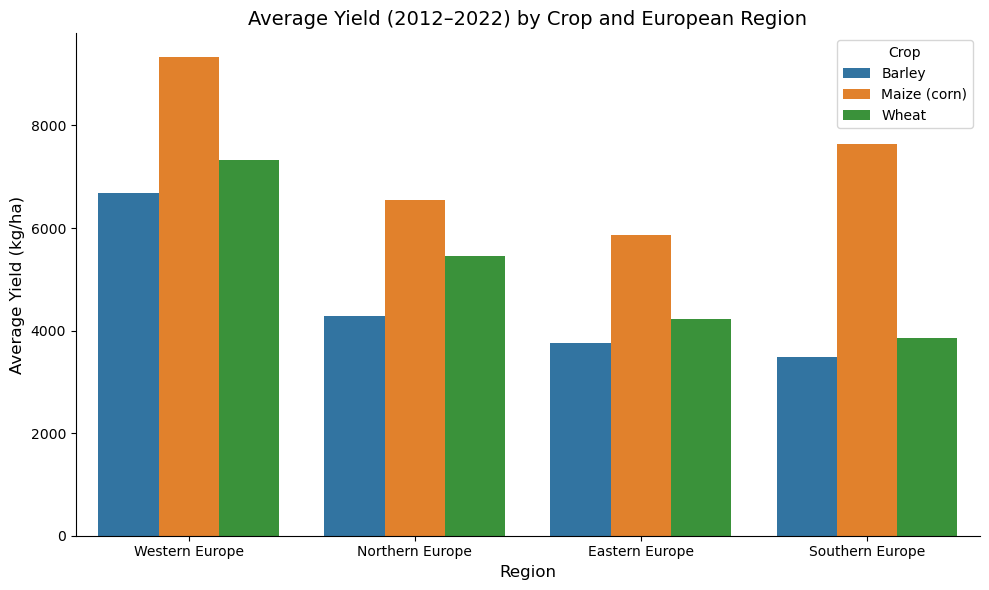

In [355]:
# Group by ITEM and REGION, compute average YIELD
avg_yield = df_filtered.groupby(['ITEM', 'REGION'])['YIELD'].mean().reset_index()

# Reorder regions for narrative clarity
region_order = ['Western Europe', 'Northern Europe', 'Eastern Europe', 'Southern Europe']
avg_yield['REGION'] = pd.Categorical(avg_yield['REGION'], categories=region_order, ordered=True)
avg_yield = avg_yield.sort_values(by=['REGION', 'ITEM'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_yield, x='REGION', y='YIELD', hue='ITEM')
sns.despine()
plt.title("Average Yield (2012–2022) by Crop and European Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Yield (kg/ha)", fontsize=12)
plt.legend(title="Crop")
plt.tight_layout()
export_plot("average_yield_by_crop_and_region")
plt.show()


In [356]:
# Group and round
avg_stats_for_plot = df_filtered.groupby(['ITEM', 'REGION'])[['AREA_HARVESTED', 'PRODUCTION_QUANTITY']].mean().reset_index()
avg_stats_for_plot[['AREA_HARVESTED', 'PRODUCTION_QUANTITY']] = avg_stats_for_plot[['AREA_HARVESTED', 'PRODUCTION_QUANTITY']].round(2)

# Order regions
region_order = ['Western Europe', 'Northern Europe', 'Eastern Europe', 'Southern Europe']
avg_stats_for_plot['REGION'] = pd.Categorical(avg_stats_for_plot['REGION'], categories=region_order, ordered=True)
avg_stats_for_plot = avg_stats_for_plot.sort_values(by=['REGION', 'ITEM'])

In [357]:
# Tabulate
print(tabulate(avg_stats_for_plot, headers='keys', tablefmt='pretty', showindex=False))

+--------------+-----------------+----------------+---------------------+
|     ITEM     |     REGION      | AREA_HARVESTED | PRODUCTION_QUANTITY |
+--------------+-----------------+----------------+---------------------+
|    Barley    | Western Europe  |   485330.38    |     3177441.46      |
| Maize (corn) | Western Europe  |   334672.44    |      3040714.2      |
|    Wheat     | Western Europe  |   1139175.07   |     8257845.05      |
|    Barley    | Northern Europe |   354690.55    |     1824782.04      |
| Maize (corn) | Northern Europe |    9706.48     |      62515.81       |
|    Wheat     | Northern Europe |   560695.69    |     3623120.48      |
|    Barley    | Eastern Europe  |   1353976.84   |     3765063.59      |
| Maize (corn) | Eastern Europe  |   1295043.0    |     7394888.08      |
|    Wheat     | Eastern Europe  |   4164252.18   |     13653482.88     |
|    Barley    | Southern Europe |   283674.09    |      913521.75      |
| Maize (corn) | Southern Europe |   2

Plot saved at: ..\results\eda\average_area_harvested_by_crop_and_region.png


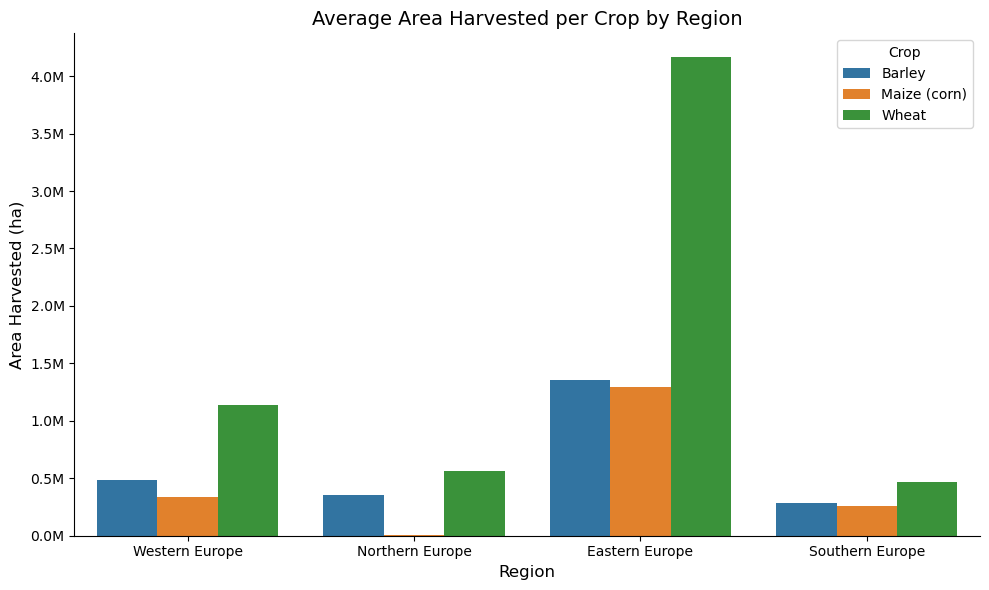

In [358]:
# Area Harvested Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_stats_for_plot, x='REGION', y='AREA_HARVESTED', hue='ITEM')
sns.despine()

# Title and labels
plt.title("Average Area Harvested per Crop by Region", fontsize=14)
plt.ylabel("Area Harvested (ha)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.legend(title="Crop")

# Format y-axis (e.g., 1,000,000 -> 1M)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

plt.tight_layout()
export_plot("average_area_harvested_by_crop_and_region")
plt.show()

Plot saved at: ..\results\eda\average_production_quantity_by_crop_and_region.png


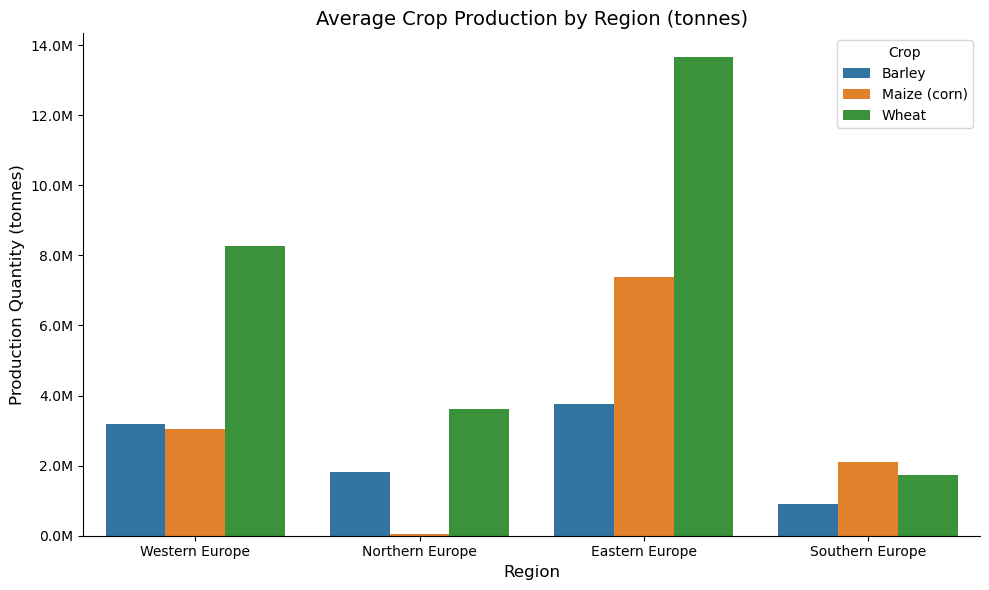

In [359]:
# Production Quantity Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_stats_for_plot, x='REGION', y='PRODUCTION_QUANTITY', hue='ITEM')
sns.despine()

plt.title("Average Crop Production by Region (tonnes)", fontsize=14)
plt.ylabel("Production Quantity (tonnes)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.legend(title="Crop")

# Format y-axis as millions
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

plt.tight_layout()
export_plot("average_production_quantity_by_crop_and_region")
plt.show()

# Statistics Per Country

In [360]:
# Group by ITEM and AREA to calculate average metrics
avg_stats = df_filtered.groupby(['ITEM', 'AREA'])[
    ['YIELD', 'PRODUCTION_QUANTITY', 'AREA_HARVESTED']
].mean().reset_index().round(2)

In [361]:
wheat_df = avg_stats[avg_stats['ITEM'] == 'Wheat']

In [362]:
# Sorted by YIELD
wheat_yield = wheat_df.sort_values(by='YIELD', ascending=False)
print("Wheat – Top by Average YIELD")
print(wheat_yield.to_string(index=False))

Wheat – Top by Average YIELD
 ITEM                   AREA   YIELD  PRODUCTION_QUANTITY  AREA_HARVESTED
Wheat                Ireland 9330.43            615569.00        66223.36
Wheat            Netherlands 8787.28           1131478.73       128668.45
Wheat                Belgium 8712.77           1776516.91       204006.18
Wheat         United Kingdom 7983.82          14219846.64      1776295.27
Wheat                Denmark 7646.45           4312492.73       562081.82
Wheat                Germany 7645.45          23659336.36      3091036.36
Wheat                 France 7020.68          36693976.38      5226731.18
Wheat                 Sweden 6506.51           2840518.18       432150.18
Wheat             Luxembourg 5989.88             80313.27        13413.82
Wheat                Czechia 5879.18           4853737.38       825385.18
Wheat            Switzerland 5669.69            497635.55        87847.36
Wheat                Croatia 5531.65            858643.73       156093.64
Wheat    

In [363]:
# Sorted by PRODUCTION_QUANTITY
wheat_prod = wheat_df.sort_values(by='PRODUCTION_QUANTITY', ascending=False)
print("Wheat – Top by Average PRODUCTION_QUANTITY")
print(wheat_prod.to_string(index=False))

Wheat – Top by Average PRODUCTION_QUANTITY
 ITEM                   AREA   YIELD  PRODUCTION_QUANTITY  AREA_HARVESTED
Wheat     Russian Federation 2670.54          71221445.29     26311419.45
Wheat                 France 7020.68          36693976.38      5226731.18
Wheat                Ukraine 3866.66          24713071.82      6365400.00
Wheat                Germany 7645.45          23659336.36      3091036.36
Wheat         United Kingdom 7983.82          14219846.64      1776295.27
Wheat                 Poland 4665.82          11020153.09      2357613.82
Wheat                Romania 3970.24           8414416.55      2115491.36
Wheat                  Italy 3943.79           7179220.11      1820219.00
Wheat                  Spain 3289.76           6918048.55      2110293.73
Wheat               Bulgaria 4769.05           5729723.82      1203079.45
Wheat                Hungary 5031.85           5083138.00      1014861.09
Wheat                Czechia 5879.18           4853737.38       82538

In [364]:
# Sorted by AREA_HARVESTED
wheat_area = wheat_df.sort_values(by='AREA_HARVESTED', ascending=False)
print("Wheat – Top by Average AREA_HARVESTED")
print(wheat_area.to_string(index=False))

Wheat – Top by Average AREA_HARVESTED
 ITEM                   AREA   YIELD  PRODUCTION_QUANTITY  AREA_HARVESTED
Wheat     Russian Federation 2670.54          71221445.29     26311419.45
Wheat                Ukraine 3866.66          24713071.82      6365400.00
Wheat                 France 7020.68          36693976.38      5226731.18
Wheat                Germany 7645.45          23659336.36      3091036.36
Wheat                 Poland 4665.82          11020153.09      2357613.82
Wheat                Romania 3970.24           8414416.55      2115491.36
Wheat                  Spain 3289.76           6918048.55      2110293.73
Wheat                  Italy 3943.79           7179220.11      1820219.00
Wheat         United Kingdom 7983.82          14219846.64      1776295.27
Wheat               Bulgaria 4769.05           5729723.82      1203079.45
Wheat                Hungary 5031.85           5083138.00      1014861.09
Wheat                Czechia 5879.18           4853737.38       825385.18


In [365]:
maize_df = avg_stats[avg_stats['ITEM'] == 'Maize (corn)']

In [366]:
# Sorted by YIELD
maize_yield = maize_df.sort_values(by='YIELD', ascending=False)
print("Maize – Top by Average YIELD")
print(maize_yield.to_string(index=False))

Maize – Top by Average YIELD
        ITEM                   AREA    YIELD  PRODUCTION_QUANTITY  AREA_HARVESTED
Maize (corn)                  Spain 11603.45           4251079.55       367088.91
Maize (corn)                 Greece 10913.85           1578003.77       144778.82
Maize (corn)            Netherlands 10359.57            147624.45        14671.27
Maize (corn)                Austria 10204.60           2146205.37       209828.27
Maize (corn)            Switzerland 10089.06            151778.64        14901.55
Maize (corn)                  Italy  9745.24           6819064.45       705964.45
Maize (corn)                Belgium  9543.16            550434.55        57348.55
Maize (corn)                Germany  9471.94           4264672.73       449263.64
Maize (corn)               Portugal  8861.15            780005.45        88832.36
Maize (corn)                 France  8780.55          14023277.93      1596551.73
Maize (corn)               Slovenia  8438.99            329002.27    

In [367]:
# Sorted by PRODUCTION_QUANTITY
maize_prod = maize_df.sort_values(by='PRODUCTION_QUANTITY', ascending=False)
print("Maize – Top by Average PRODUCTION_QUANTITY")
print(maize_prod.to_string(index=False))

Maize – Top by Average PRODUCTION_QUANTITY
        ITEM                   AREA    YIELD  PRODUCTION_QUANTITY  AREA_HARVESTED
Maize (corn)                Ukraine  6352.11          29704255.45      4653781.82
Maize (corn)                 France  8780.55          14023277.93      1596551.73
Maize (corn)     Russian Federation  5070.04          13047598.96      2560683.73
Maize (corn)                Romania  4752.58          12035596.09      2543720.36
Maize (corn)                Hungary  6631.47           6968366.73      1053701.18
Maize (corn)                  Italy  9745.24           6819064.45       705964.45
Maize (corn)                 Serbia  6135.69           6062808.68       988162.73
Maize (corn)                 Poland  6587.82           4894779.73       737559.45
Maize (corn)                Germany  9471.94           4264672.73       449263.64
Maize (corn)                  Spain 11603.45           4251079.55       367088.91
Maize (corn)               Bulgaria  6027.64           

In [368]:
# Sorted by AREA_HARVESTED
maize_area = maize_df.sort_values(by='AREA_HARVESTED', ascending=False)
print("Maize – Top by Average AREA_HARVESTED")
print(maize_area.to_string(index=False))

Maize – Top by Average AREA_HARVESTED
        ITEM                   AREA    YIELD  PRODUCTION_QUANTITY  AREA_HARVESTED
Maize (corn)                Ukraine  6352.11          29704255.45      4653781.82
Maize (corn)     Russian Federation  5070.04          13047598.96      2560683.73
Maize (corn)                Romania  4752.58          12035596.09      2543720.36
Maize (corn)                 France  8780.55          14023277.93      1596551.73
Maize (corn)                Hungary  6631.47           6968366.73      1053701.18
Maize (corn)                 Serbia  6135.69           6062808.68       988162.73
Maize (corn)                 Poland  6587.82           4894779.73       737559.45
Maize (corn)                  Italy  9745.24           6819064.45       705964.45
Maize (corn)               Bulgaria  6027.64           2877961.82       480706.45
Maize (corn)                Moldova  3134.45           1483947.27       467670.91
Maize (corn)                Germany  9471.94           42646

In [369]:
barley_df = avg_stats[avg_stats['ITEM'] == 'Barley']

In [370]:
# Sorted by YIELD
barley_yield = barley_df.sort_values(by='YIELD', ascending=False)
print("Barley – Top by Average YIELD")
print(barley_yield.to_string(index=False))

Barley – Top by Average YIELD
  ITEM                   AREA   YIELD  PRODUCTION_QUANTITY  AREA_HARVESTED
Barley                Belgium 7990.13            366657.36        46002.82
Barley                Ireland 7712.65           1494954.64       193819.64
Barley            Netherlands 6972.74            226961.91        32548.64
Barley                Germany 6706.12          10824909.09      1615909.09
Barley            Switzerland 6583.71            185115.18        28152.45
Barley                 France 6329.55          11500138.05      1820634.45
Barley         United Kingdom 6155.45           7067272.73      1148818.18
Barley                Denmark 5826.76           3833190.91       662590.91
Barley                Austria 5665.03            783459.57       138868.36
Barley             Luxembourg 5576.69             37335.91         6707.55
Barley                Czechia 5227.08           1772089.42       339878.91
Barley                Hungary 4942.69           1369737.45       27773

In [371]:
# Sorted by PRODUCTION_QUANTITY
barley_prod = barley_df.sort_values(by='PRODUCTION_QUANTITY', ascending=False)
print("Barley – Top by Average PRODUCTION_QUANTITY")
print(barley_prod.to_string(index=False))

Barley – Top by Average PRODUCTION_QUANTITY
  ITEM                   AREA   YIELD  PRODUCTION_QUANTITY  AREA_HARVESTED
Barley     Russian Federation 2301.93          18703346.54      8120026.45
Barley                 France 6329.55          11500138.05      1820634.45
Barley                Germany 6706.12          10824909.09      1615909.09
Barley                  Spain 3098.16           8152810.73      2631972.55
Barley                Ukraine 3059.62           8045502.73      2670490.91
Barley         United Kingdom 6155.45           7067272.73      1148818.18
Barley                Denmark 5826.76           3833190.91       662590.91
Barley                 Poland 3797.70           3234411.73       862270.36
Barley                Czechia 5227.08           1772089.42       339878.91
Barley                Romania 3621.22           1651888.09       456760.91
Barley                Finland 3637.05           1534065.45       421847.27
Barley                 Sweden 4786.46           1525290.

In [372]:
# Sorted by AREA_HARVESTED
barley_area = barley_df.sort_values(by='AREA_HARVESTED', ascending=False)
print("Barley – Top by Average AREA_HARVESTED")
print(barley_area.to_string(index=False))

Barley – Top by Average AREA_HARVESTED
  ITEM                   AREA   YIELD  PRODUCTION_QUANTITY  AREA_HARVESTED
Barley     Russian Federation 2301.93          18703346.54      8120026.45
Barley                Ukraine 3059.62           8045502.73      2670490.91
Barley                  Spain 3098.16           8152810.73      2631972.55
Barley                 France 6329.55          11500138.05      1820634.45
Barley                Germany 6706.12          10824909.09      1615909.09
Barley         United Kingdom 6155.45           7067272.73      1148818.18
Barley                 Poland 3797.70           3234411.73       862270.36
Barley                Denmark 5826.76           3833190.91       662590.91
Barley                Belarus 3188.92           1463167.36       459786.64
Barley                Romania 3621.22           1651888.09       456760.91
Barley                Finland 3637.05           1534065.45       421847.27
Barley                Czechia 5227.08           1772089.42   

## Correlation Analysis

In [373]:
indicator_labels = {
    "WB_CCKP_CDD": "Consecutive Dry Days",
    "WB_CCKP_CDD65": "Cooling Degree Days 65°F",
    "WB_CCKP_CSDI": "Cold Spell Duration Index",
    "WB_CCKP_CWD": "Consecutive Wet Days",
    "WB_CCKP_FD": "Frost Days",
    "WB_CCKP_HD30": "Hot Days >30°C",
    "WB_CCKP_HD35": "Hot Days >35°C",
    "WB_CCKP_HD40": "Hot Days >40°C",
    "WB_CCKP_HD42": "Hot Days >42°C",
    "WB_CCKP_HD45": "Hot Days >45°C",
    "WB_CCKP_HD50": "Hot Days >50°C",
    "WB_CCKP_HDD65": "Heating Degree Days 65°F",
    "WB_CCKP_HI35": "Heat Index >35°C",
    "WB_CCKP_HI37": "Heat Index >37°C",
    "WB_CCKP_HI39": "Heat Index >39°C",
    "WB_CCKP_HI41": "Heat Index >41°C",
    "WB_CCKP_HURS": "Relative Humidity",
    "WB_CCKP_ID": "Ice Days",
    "WB_CCKP_PR": "Precipitation",
    "WB_CCKP_R20MM": "Heavy Rain Days (≥20mm)",
    "WB_CCKP_R50MM": "Very Heavy Rain Days (≥50mm)",
    "WB_CCKP_R95PTOT": "Extreme Rain (95th percentile)",
    "WB_CCKP_RX1DAY": "Max 1-Day Precipitation",
    "WB_CCKP_RX5DAY": "Max 5-Day Precipitation",
    "WB_CCKP_SD": "Snow Days",
    "WB_CCKP_TAS": "Mean Temperature",
    "WB_CCKP_TASMAX": "Max Temperature",
    "WB_CCKP_TASMIN": "Min Temperature",
    "WB_CCKP_TNN": "Min of Daily Min Temperatures",
    "WB_CCKP_TR": "Tropical Nights",
    "WB_CCKP_TR23": "Tropical Nights >23°C",
    "WB_CCKP_TR26": "Tropical Nights >26°C",
    "WB_CCKP_TR29": "Tropical Nights >29°C",
    "WB_CCKP_TR32": "Tropical Nights >32°C",
    "WB_CCKP_TX84RR": "Max Temp on Rainy Days (84th %)",
    "WB_CCKP_TXX": "Max of Daily Max Temperatures",
    "WB_CCKP_WSDI": "Warm Spell Duration Index"
}


In [374]:
# Grouping of indicators by theme
heatwave_vars = [
    "WB_CCKP_HD30", "WB_CCKP_HD35", "WB_CCKP_HD40", "WB_CCKP_HD42", "WB_CCKP_HD45",
    "WB_CCKP_HI35", "WB_CCKP_HI37", "WB_CCKP_HI39", "WB_CCKP_HI41",
    "WB_CCKP_TASMAX", "WB_CCKP_TR", "WB_CCKP_TR23", "WB_CCKP_TR26", "WB_CCKP_TR29", "WB_CCKP_TR32",
    "WB_CCKP_TX84RR", "WB_CCKP_TXX", "WB_CCKP_WSDI"
]

# Missing indicators compared to above: WB_CCKP_HD40, WB_CCKP_HD42, WB_CCKP_HI37, WB_CCKP_HI39, WB_CCKP_HI41
heatwave_vars = [
    "WB_CCKP_HD30", "WB_CCKP_HD35", "WB_CCKP_HD45",
    "WB_CCKP_HI35",
    "WB_CCKP_TASMAX", "WB_CCKP_TR", "WB_CCKP_TR23", "WB_CCKP_TR26", "WB_CCKP_TR29", "WB_CCKP_TR32",
    "WB_CCKP_TX84RR", "WB_CCKP_TXX", "WB_CCKP_WSDI"
]

drought_vars = [
    "WB_CCKP_CDD", "WB_CCKP_PR", "WB_CCKP_R20MM", "WB_CCKP_R50MM", "WB_CCKP_R95PTOT",
    "WB_CCKP_RX1DAY", "WB_CCKP_RX5DAY", "WB_CCKP_CWD"
]

frost_vars = [
    "WB_CCKP_FD", "WB_CCKP_TNN", "WB_CCKP_TASMIN", "WB_CCKP_ID", "WB_CCKP_CSDI", "WB_CCKP_HDD65"
]


In [375]:
def plot_group_heatmap(df, variables, title, label_map, item_name):
    features = ['YIELD'] + [var for var in variables if var in df.columns]
    labelled = ['YIELD'] + [label_map.get(var, var) for var in variables if var in df.columns]
    
    if len(features) <= 1:
        print(f"No valid variables found for {title} - {item_name}")
        return
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f",
                linewidths=0.5, xticklabels=labelled, yticklabels=labelled)
    plt.title(f"{item_name}: YIELD vs {title} Indicators")
    plt.tight_layout()
    export_plot(f"{item_name.lower()}_{title.lower()}_heatmap")
    plt.show()


def plot_barley_heatmaps(df):
    df_item = df[df['ITEM'] == 'Barley']
    plot_group_heatmap(df_item, heatwave_vars, "Heatwave", indicator_labels, "Barley")
    plot_group_heatmap(df_item, drought_vars, "Drought", indicator_labels, "Barley")
    plot_group_heatmap(df_item, frost_vars, "Frost", indicator_labels, "Barley")


def plot_wheat_heatmaps(df):
    df_item = df[df['ITEM'] == 'Wheat']
    plot_group_heatmap(df_item, heatwave_vars, "Heatwave", indicator_labels, "Wheat")
    plot_group_heatmap(df_item, drought_vars, "Drought", indicator_labels, "Wheat")
    plot_group_heatmap(df_item, frost_vars, "Frost", indicator_labels, "Wheat")


def plot_maize_heatmaps(df):
    df_item = df[df['ITEM'] == 'Maize (corn)']
    plot_group_heatmap(df_item, heatwave_vars, "Heatwave", indicator_labels, "Maize (corn)")
    plot_group_heatmap(df_item, drought_vars, "Drought", indicator_labels, "Maize (corn)")
    plot_group_heatmap(df_item, frost_vars, "Frost", indicator_labels, "Maize (corn)")


Plot saved at: ..\results\eda\barley_heatwave_heatmap.png


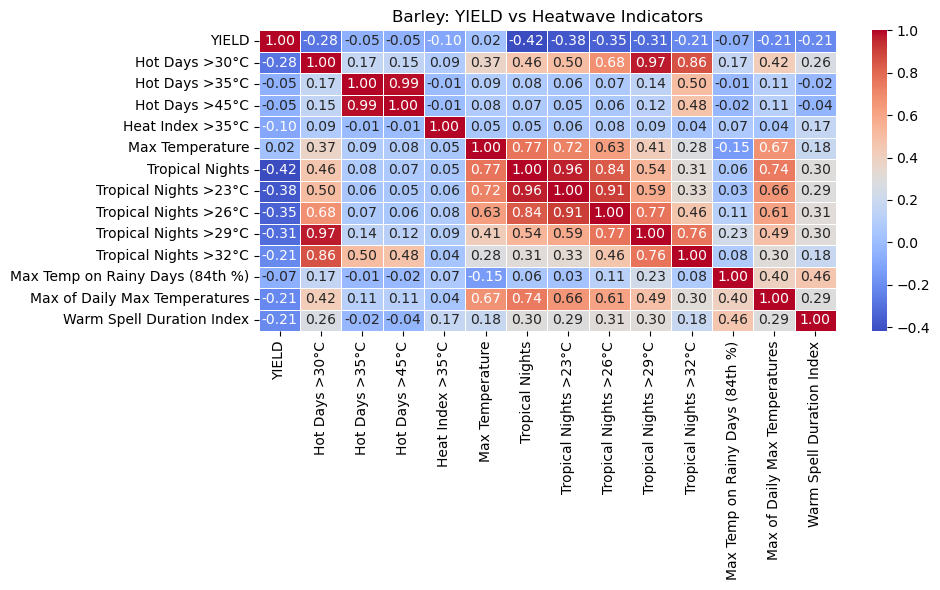

Plot saved at: ..\results\eda\barley_drought_heatmap.png


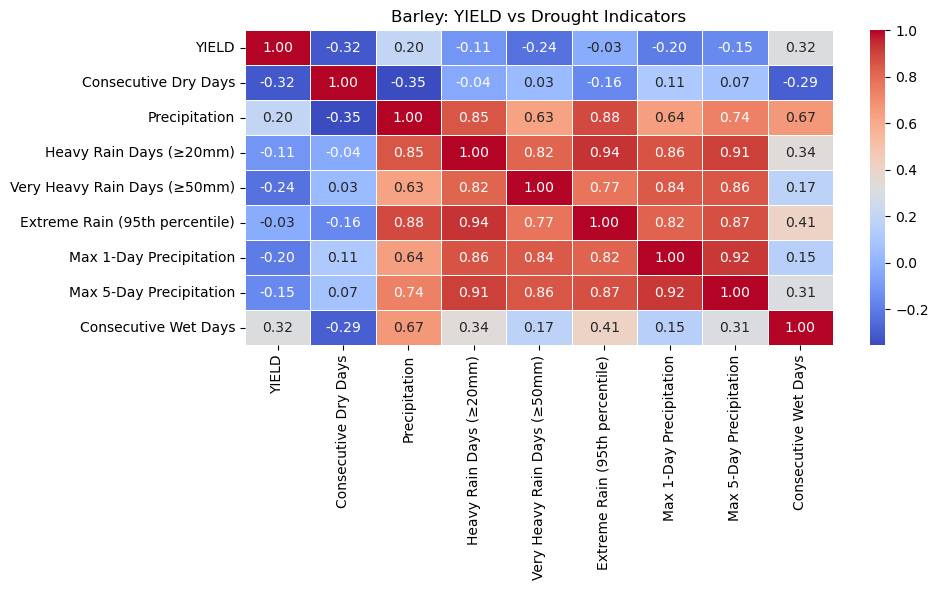

Plot saved at: ..\results\eda\barley_frost_heatmap.png


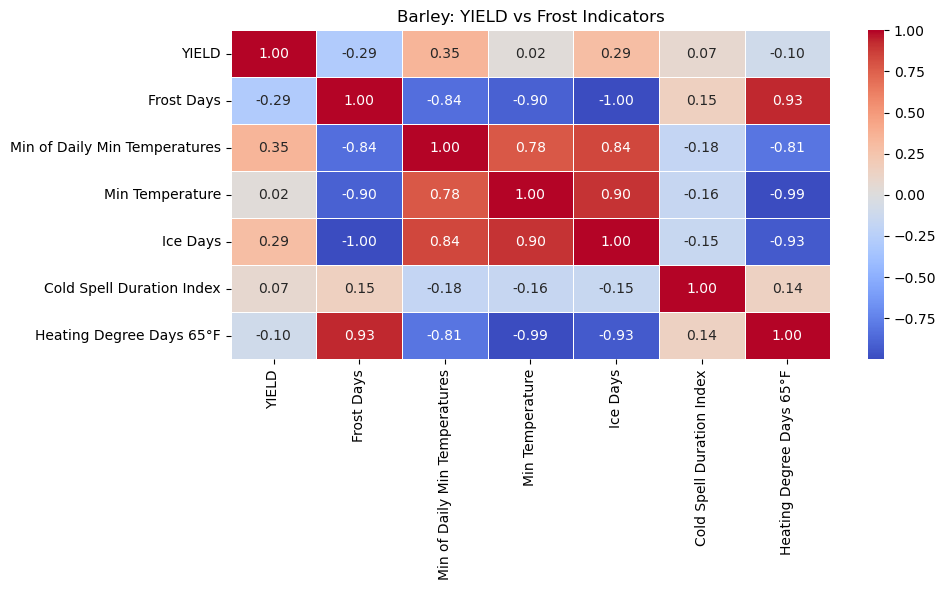

In [376]:
plot_barley_heatmaps(df_filtered)

Plot saved at: ..\results\eda\wheat_heatwave_heatmap.png


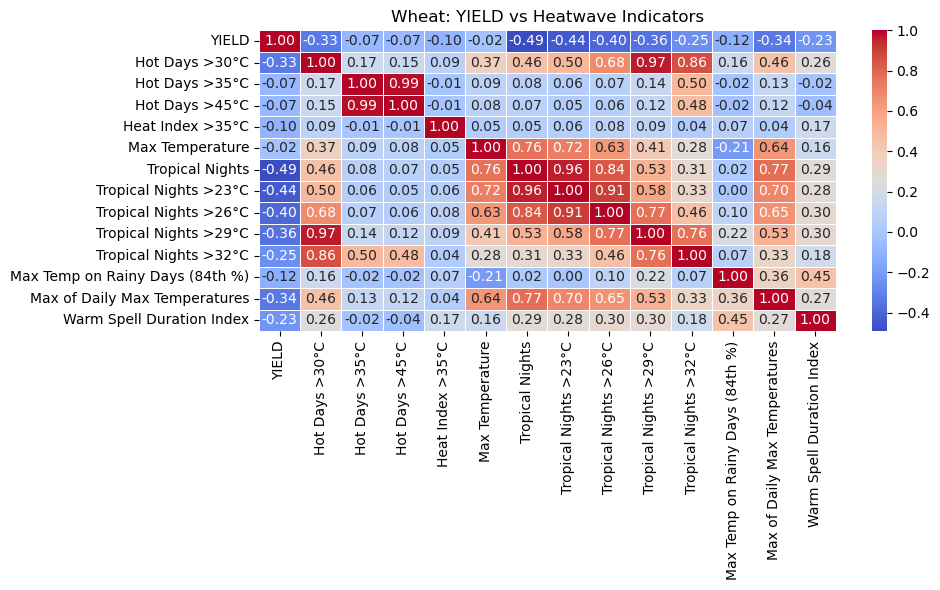

Plot saved at: ..\results\eda\wheat_drought_heatmap.png


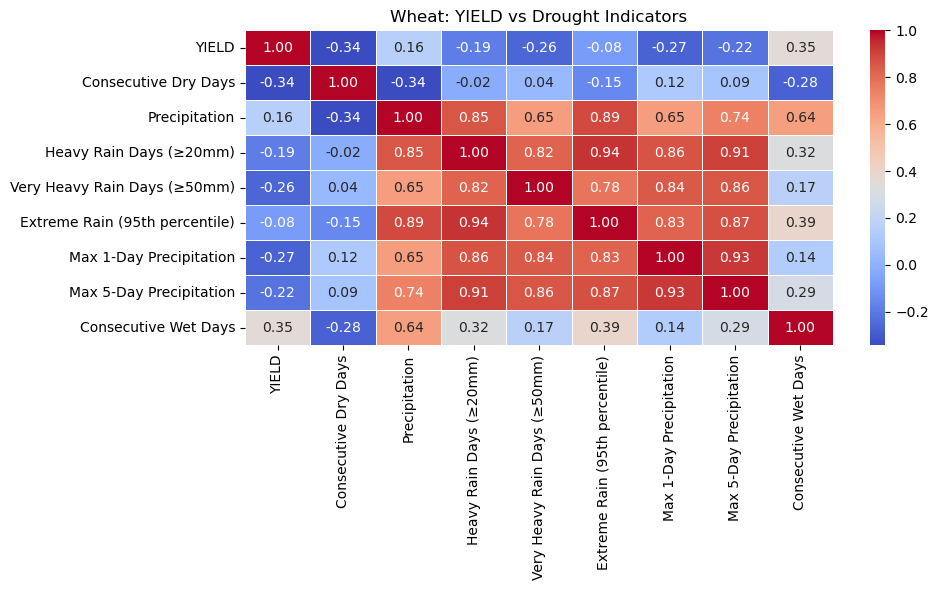

Plot saved at: ..\results\eda\wheat_frost_heatmap.png


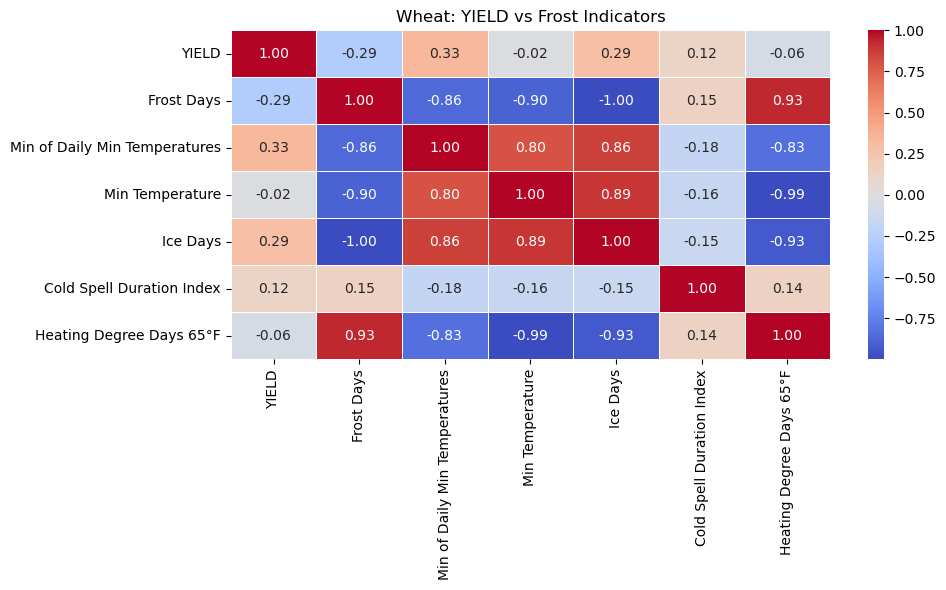

In [377]:
plot_wheat_heatmaps(df_filtered)

Plot saved at: ..\results\eda\maize (corn)_heatwave_heatmap.png


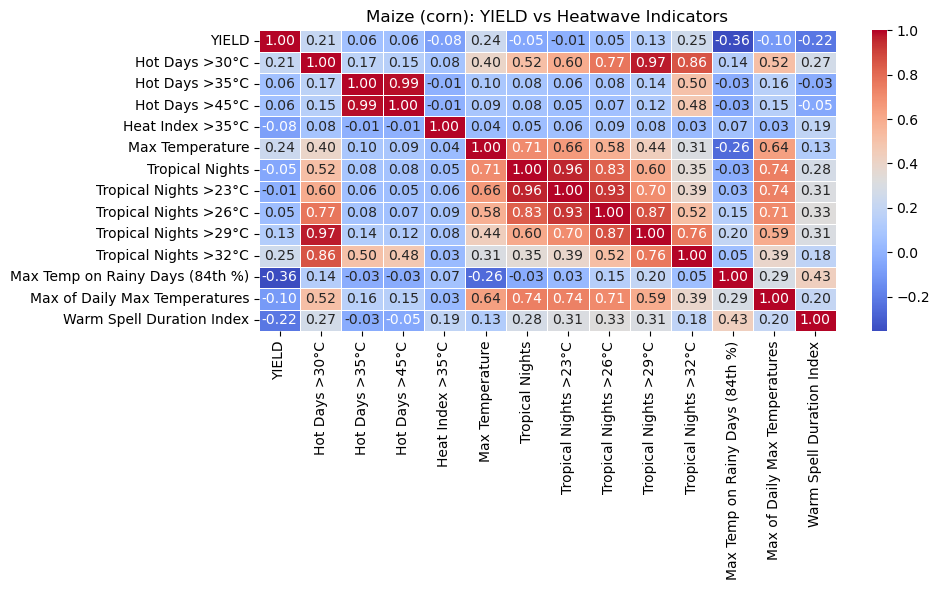

Plot saved at: ..\results\eda\maize (corn)_drought_heatmap.png


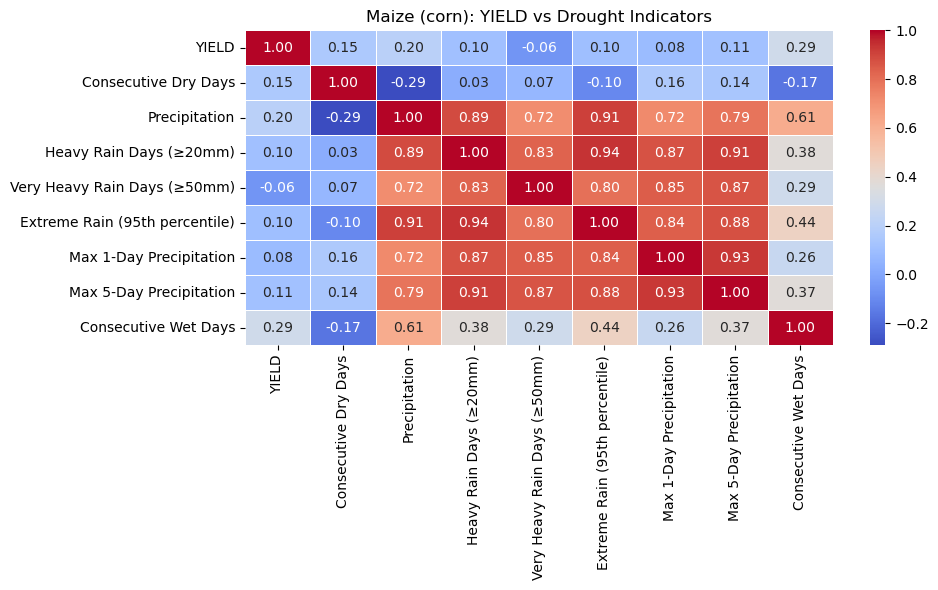

Plot saved at: ..\results\eda\maize (corn)_frost_heatmap.png


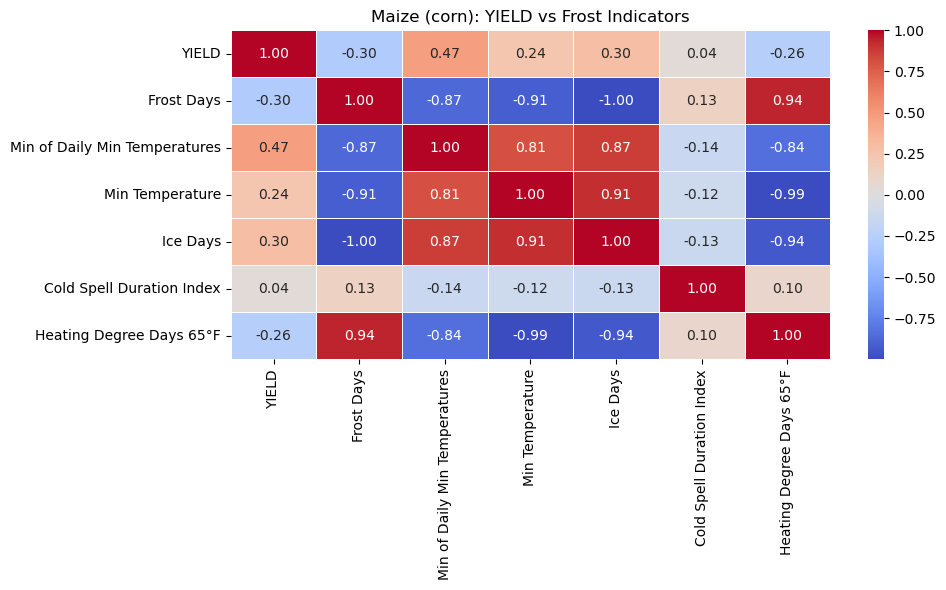

In [378]:
plot_maize_heatmaps(df_filtered)

In [379]:
def plot_combined_yield_correlation_by_category(df, category, label_map):
    # Define mapping
    category_map = {
        "Heatwave": heatwave_vars,
        "Drought": drought_vars,
        "Frost": frost_vars
    }

    if category not in category_map:
        print(f"Invalid category: {category}")
        return

    variables = category_map[category]
    crops = ["Barley", "Maize (corn)", "Wheat"]  # Desired order
    records = []

    for crop in crops:
        df_crop = df[df['ITEM'] == crop]
        for var in variables:
            if var in df_crop.columns:
                corr = df_crop[['YIELD', var]].dropna().corr().iloc[0, 1]
                records.append({
                    "Indicator": label_map.get(var, var),
                    "Correlation": corr,
                    "Crop": crop
                })

    # Create DataFrame
    corr_df = pd.DataFrame(records)
    corr_df["Crop"] = pd.Categorical(corr_df["Crop"], categories=crops, ordered=True)

    # Sort indicators by mean correlation
    order = (
        corr_df.groupby("Indicator")["Correlation"]
        .mean()
        .sort_values(ascending=False)
        .index
    )

    # Define custom colors for the crops
    crop_palette = {
        "Barley": sns.color_palette()[0],       # blue
        "Maize (corn)": sns.color_palette()[1], # orange
        "Wheat": sns.color_palette()[2]         # green
    }

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=corr_df,
        x="Indicator",
        y="Correlation",
        hue="Crop",
        order=order,
        palette=crop_palette
    )
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Correlation of YIELD with {category} Indicators (All Crops)")
    plt.tight_layout()
    export_plot(f"yield_correlation_{category.lower()}_indicators")
    plt.show()

Plot saved at: ..\results\eda\yield_correlation_heatwave_indicators.png


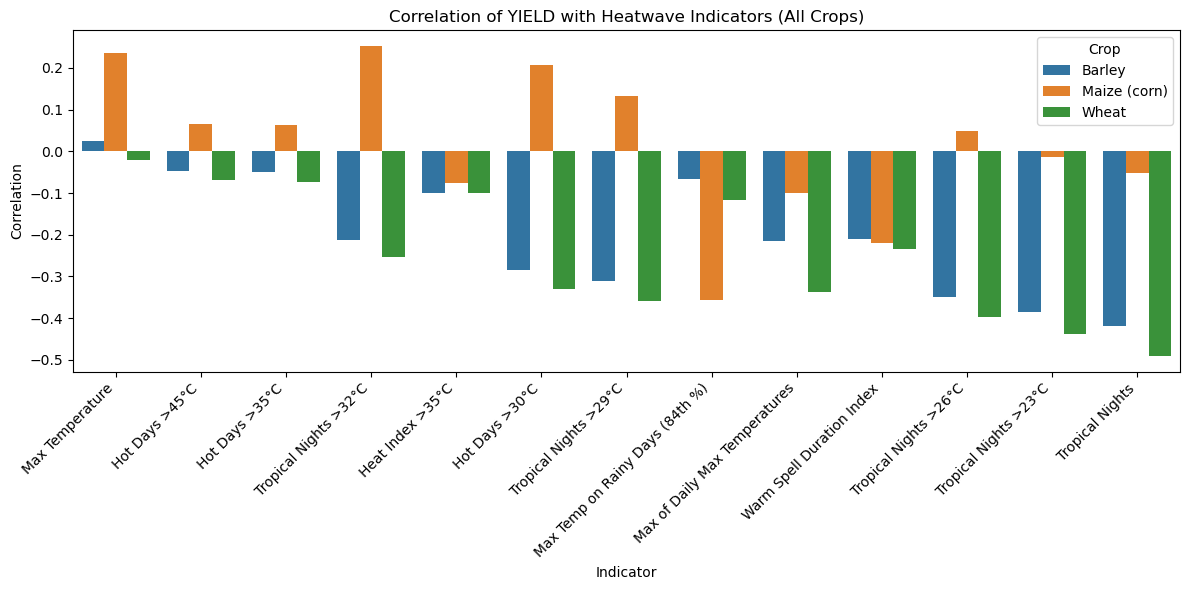

In [380]:
plot_combined_yield_correlation_by_category(df_filtered, "Heatwave", indicator_labels)


Plot saved at: ..\results\eda\yield_correlation_drought_indicators.png


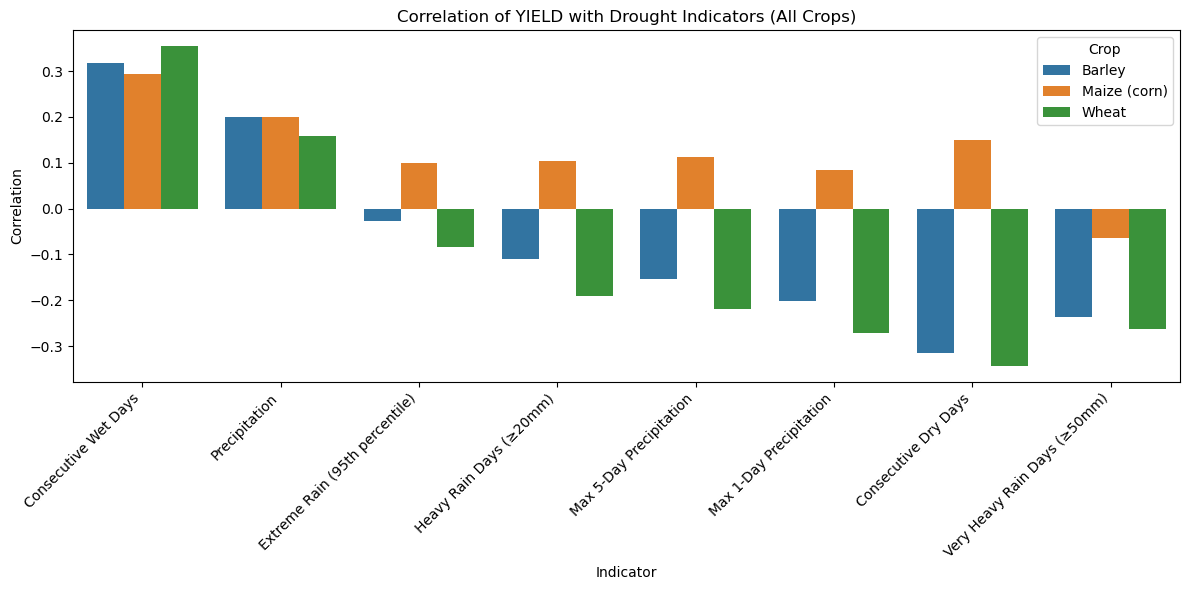

In [381]:
plot_combined_yield_correlation_by_category(df_filtered, "Drought", indicator_labels)

Plot saved at: ..\results\eda\yield_correlation_frost_indicators.png


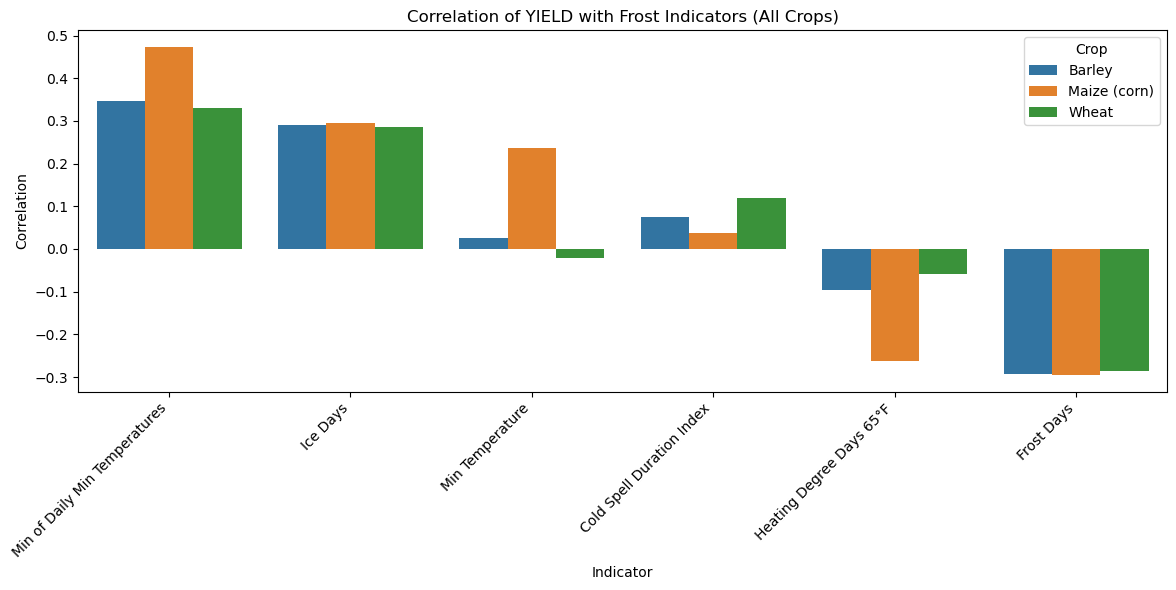

In [382]:
plot_combined_yield_correlation_by_category(df_filtered, "Frost", indicator_labels)

In [383]:
def plot_combined_heatmap_yield_correlation_by_category(df, category, label_map):
    import numpy as np

    # Map category to variable list
    category_map = {
        "Heatwave": heatwave_vars,
        "Drought": drought_vars,
        "Frost": frost_vars
    }

    if category not in category_map:
        print(f"Invalid category: {category}")
        return

    variables = category_map[category]
    crops = ["Barley", "Wheat", "Maize (corn)"]

    # Initialize matrix
    correlation_data = {}

    for var in variables:
        indicator_label = label_map.get(var, var)
        correlation_data[indicator_label] = {}

        for crop in crops:
            df_crop = df[df['ITEM'] == crop]
            if var in df_crop.columns:
                corr = df_crop[['YIELD', var]].dropna().corr().iloc[0, 1]
            else:
                corr = np.nan  # Not available
            correlation_data[indicator_label][crop] = corr

    # Convert to DataFrame
    corr_df = pd.DataFrame.from_dict(correlation_data, orient='index')
    corr_df = corr_df[crops]  # Ensure column order

    # Plot heatmap
    plt.figure(figsize=(10, max(6, len(corr_df) * 0.5)))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f"YIELD Correlation with {category} Indicators by Crop")
    plt.xlabel("Crop")
    plt.ylabel("Indicator")
    plt.tight_layout()
    export_plot(f"heatmap_yield_correlation_{category.lower()}_indicators")
    plt.show()


Plot saved at: ..\results\eda\heatmap_yield_correlation_heatwave_indicators.png


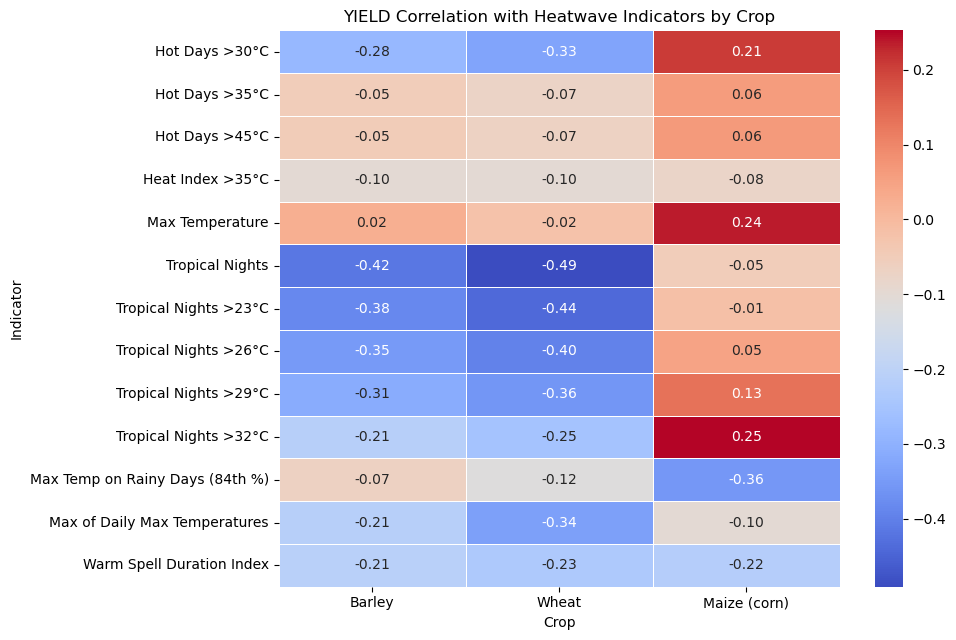

In [384]:
plot_combined_heatmap_yield_correlation_by_category(df_filtered, "Heatwave", indicator_labels)

Plot saved at: ..\results\eda\heatmap_yield_correlation_drought_indicators.png


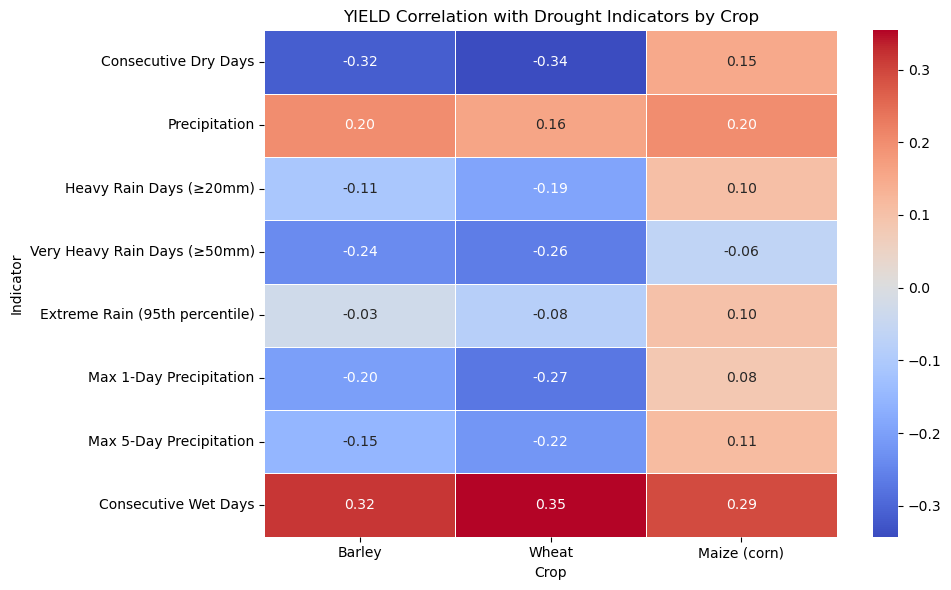

In [385]:
plot_combined_heatmap_yield_correlation_by_category(df_filtered, "Drought", indicator_labels)

Plot saved at: ..\results\eda\heatmap_yield_correlation_frost_indicators.png


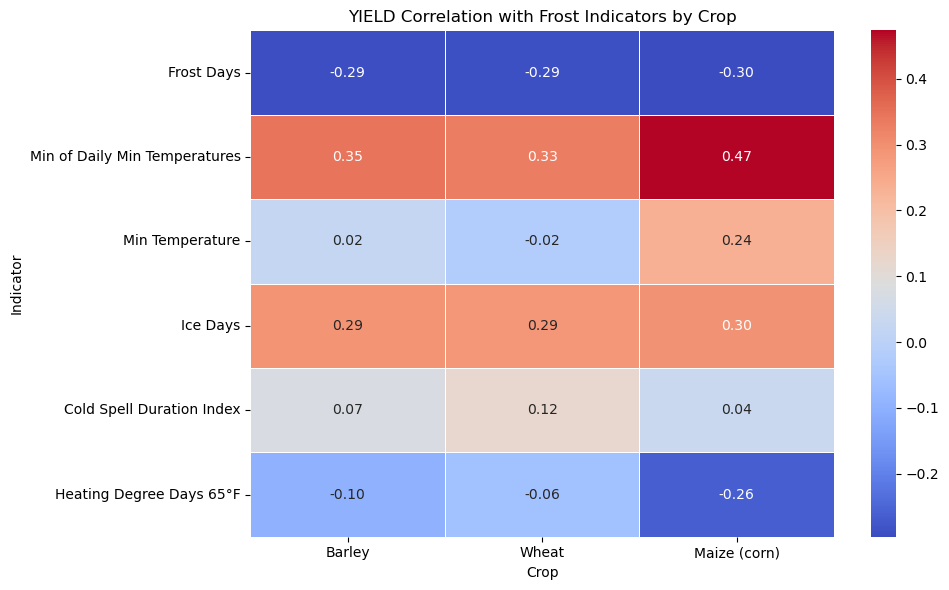

In [386]:
plot_combined_heatmap_yield_correlation_by_category(df_filtered, "Frost", indicator_labels)